In [3]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import h5py
# import geohash
from sklearn.cluster import KMeans
import json

In [3]:
#1
data = pd.read_csv('/home/share/grab_traffic_management/raw_data/training.csv' ,sep=",")

In [4]:
#2
coord = data.groupby(['geohash6']).size().reset_index(name='counts')

# all unique geohash6
coord_array = coord['geohash6'].values

In [5]:
coord_array

array(['qp02yc', 'qp02yf', 'qp02yu', ..., 'qp0dnh', 'qp0dnj', 'qp0dnn'],
      dtype=object)

In [6]:
gps = np.zeros((len(coord_array), 2))
for idx in range(len(coord_array)):
    
    tup = geohash.decode(coord_array[idx])
    gps[idx][0] = float(tup[0])
    gps[idx][1] = float(tup[1])
gps

array([[-5.48492432, 90.65368652],
       [-5.47943115, 90.65368652],
       [-5.46844482, 90.65368652],
       ...,
       [-5.24871826, 90.97229004],
       [-5.2432251 , 90.97229004],
       [-5.23773193, 90.97229004]])

In [69]:
num_clusters = 13
est = KMeans(n_clusters= num_clusters)
est.fit(gps)

gps_label = est.predict(gps)

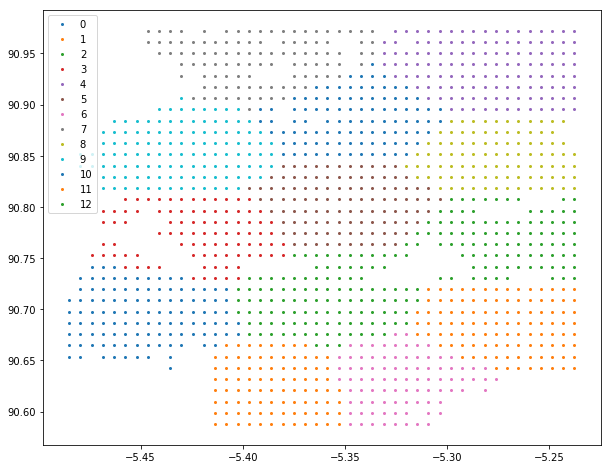

In [70]:
label_type = range(num_clusters)

fig, ax = plt.subplots(figsize = (10,8))

for label in label_type:
    ax.scatter(
        gps[gps_label == label, 0], 
        gps[gps_label == label, 1],label = label, s=4)
    
ax.legend()

In [71]:
gps_frame = pd.DataFrame( {'geohash6': coord_array, 'label': gps_label})

In [72]:
feature_idx = []
gps_list = []

start_feature_idx = 0

for label in label_type:

    cluster = gps_frame[gps_frame['label']==label]['geohash6'].values
    gps_list.append(cluster)
    
    end_feature_idx = start_feature_idx + len(cluster)
    feature_idx.append( (start_feature_idx, end_feature_idx))
    
    start_feature_idx = end_feature_idx

In [73]:
coord_array = np.concatenate(gps_list)

In [74]:
coord_array

array(['qp09v1', 'qp09v4', 'qp09v7', ..., 'qp08g6', 'qp03wz', 'qp03y1'],
      dtype=object)

In [75]:
feature_idx

[(0, 97),
 (97, 186),
 (186, 280),
 (280, 369),
 (369, 497),
 (497, 605),
 (605, 692),
 (692, 794),
 (794, 888),
 (888, 1005),
 (1005, 1116),
 (1116, 1221),
 (1221, 1329)]

In [76]:
#3
# index dict of coord
coord_dict = {}

for i, j in enumerate(coord_array):
    coord_dict[j] = i

In [77]:
geohash_13c = {'coord_dict': coord_dict, 'feature_idx': feature_idx}

fp = json.dumps(geohash_13c)

open('/home/share/grab_traffic_management/geohash_13c.json','w').write(fp)

20346

In [247]:
# fp = json.loads((open('share/grab_traffic_management/geohash_3c.json','r')).read())

In [227]:
data['day'].max()

61

In [78]:
#4
# index dict of unique time stamps

daytime_dict = {}
count = 0
for day in range( data['day'].min(), data['day'].max() + 1 ):
    for hour in range(0, 24):
        for mins in [0, 15, 30, 45]:
            
            daytime = '{},{}:{}'.format(day, hour, mins)
            daytime_dict[daytime] = count
            
            count += 1
            

In [79]:
a = data.groupby(['timestamp']).size().reset_index(name='counts')
a['timestamp'].values

array(['0:0', '0:15', '0:30', '0:45', '10:0', '10:15', '10:30', '10:45',
       '11:0', '11:15', '11:30', '11:45', '12:0', '12:15', '12:30',
       '12:45', '13:0', '13:15', '13:30', '13:45', '14:0', '14:15',
       '14:30', '14:45', '15:0', '15:15', '15:30', '15:45', '16:0',
       '16:15', '16:30', '16:45', '17:0', '17:15', '17:30', '17:45',
       '18:0', '18:15', '18:30', '18:45', '19:0', '19:15', '19:30',
       '19:45', '1:0', '1:15', '1:30', '1:45', '20:0', '20:15', '20:30',
       '20:45', '21:0', '21:15', '21:30', '21:45', '22:0', '22:15',
       '22:30', '22:45', '23:0', '23:15', '23:30', '23:45', '2:0', '2:15',
       '2:30', '2:45', '3:0', '3:15', '3:30', '3:45', '4:0', '4:15',
       '4:30', '4:45', '5:0', '5:15', '5:30', '5:45', '6:0', '6:15',
       '6:30', '6:45', '7:0', '7:15', '7:30', '7:45', '8:0', '8:15',
       '8:30', '8:45', '9:0', '9:15', '9:30', '9:45'], dtype=object)

In [80]:
len(daytime_dict)

5856

In [81]:
data.shape

(4206321, 4)

In [82]:
len(coord_dict)

1329

In [83]:
data.head()

,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468


In [84]:
#5
# initialize nested list to create data array of (timesteps, total_num_geohash6 )

row = len(daytime_dict)
col = len(coord_dict)

assert col == 1329, 'number of unique geohashs in test set must be the same as that of the training set'


data_nested_list =[]
# demand = [0 for j in range(len(coord_dict))]

for i in range(row):
    
    data_nested_list.append([0 for j in range(col)])

In [85]:
#6
# store all values in array
geohash_array = data['geohash6'].values
daytime_array = data['day'].astype(str).values + ',' + data['timestamp'].values
demand_array = data['demand'].values

In [86]:
#7

# append values to nested list

for idx in range(len(data)):
    
    row_idx = daytime_dict[daytime_array[idx] ]
    col_idx = coord_dict[geohash_array[idx] ]
    
    data_nested_list[row_idx][col_idx] = demand_array[idx]

In [87]:
#8

# create data array

data_array = np.array(data_nested_list)

In [88]:
#9
# save data array to file
hf = h5py.File( '/home/share/grab_traffic_management/train_processed_13c.h5', 'w')

hf.create_dataset('data', data =  data_array)

hf.close()

In [19]:
data_array[:,1299].reshape(-1, 1).shape

(5856, 1)

In [14]:
data_array[200:300]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.00323485,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00282094,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
data_array.shape

(5856, 1329)

In [16]:
coord_dict['qp0dj5']

1299

In [14]:
daytime_dict[daytime_array[80175]]

2

In [13]:
daytime_array[80175]

'1,0:30'

In [15]:
data[ (data['geohash6'] == 'qp0dj5') &  (data['day'] == 1)]

,geohash6,day,timestamp,demand
80175,qp0dj5,1,0:30,0.029581
118956,qp0dj5,1,15:30,0.037087
197739,qp0dj5,1,5:0,0.067830
290188,qp0dj5,1,7:30,0.019099
367654,qp0dj5,1,21:30,0.003436
457929,qp0dj5,1,1:45,0.049659
462222,qp0dj5,1,9:0,0.025914
462588,qp0dj5,1,12:0,0.070962
565571,qp0dj5,1,3:15,0.013114
592860,qp0dj5,1,9:45,0.047876


In [17]:
daytime_list = []
count = 0
for day in range(1, 62):
    for hour in range(0, 24):
        for mins in [0, 15, 30, 45]:
            
            daytime = '{},{}:{}'.format(day, hour, mins)
            daytime_list.append(daytime)
            
daytime_list = np.array(daytime_list)

In [18]:
np.arange(0, 10, step=2)

array([0, 2, 4, 6, 8])

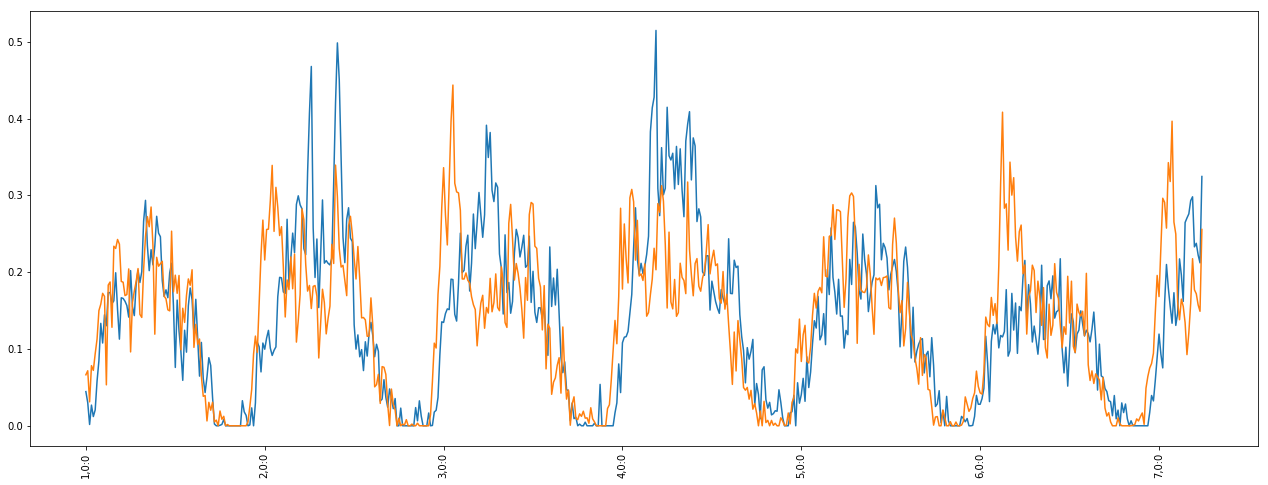

In [189]:
steps = np.arange(0, len(daytime_list), step=24*4)
steps = np.arange(0, 600, step=24*4)
fig, ax = plt.subplots(figsize = (22,8))
# ax.scatter(
# 			np.arange(len(daytime_dict)), 
# 			data_array[:, 1299],s=4)
# plt.plot(data_array[:500, 1299])
# plt.plot(data_array[:500, 1200])
# plt.plot(data_array[:500, 1309])
# plt.plot(data_array[:500, 1299])
# plt.plot(data_array[:500, 100])
# plt.plot(data_array[:600, 400])
# plt.plot(data_array[:600, 401])
# plt.plot(data_array[:600, 405])
# plt.plot(data_array[:600, 403])
plt.plot(data_array[:600, 799])
# plt.plot(data_array[:600, 1])
# plt.plot(smooth_450)
# plt.plot(b[:300])
# plt.plot(data_array[:, 1200])
plt.plot(data_array[:600, 800])
plt.xticks( steps , daytime_list[steps.tolist()], rotation=90 )
plt.show()

In [100]:
0/0

ZeroDivisionError: division by zero

In [27]:
data_array[:10, 450]

array([0.02348429, 0.00234344, 0.02358411, 0.09210261, 0.03463199,
       0.02105501, 0.12222825, 0.04415784, 0.08995866, 0.13944927])

In [38]:
data_array[:10, 451]

array([0.        , 0.        , 0.06930635, 0.02213623, 0.0208335 ,
       0.04904458, 0.07532632, 0.10722598, 0.02788407, 0.04377317])

In [41]:
fa = pd.DataFrame({'a':data_array[:10, 450],'b':data_array[:10, 451]} )

In [42]:
fa.rolling(window = 3).mean()

,a,b
0,NaN,NaN
1,NaN,NaN
2,0.016471,0.023102
3,0.039343,0.030481
4,0.050106,0.037425
5,0.049263,0.030671
6,0.059305,0.048401
7,0.062480,0.077199
8,0.085448,0.070145
9,0.091189,0.059628


In [101]:
rolling_size = 20
smooth_450 = pd.DataFrame(data_array[:600, 450]).rolling(window = rolling_size).mean()

In [102]:
smooth_450.head()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [103]:
b = data_array[:rolling_size - 1, [450]]

In [104]:
b.shape

(19, 1)

In [105]:
a = np.array(smooth_450.iloc[rolling_size - 1:])

In [106]:
smooth_450 = np.concatenate([b, a], axis = 0)

In [72]:
b.shape

(4, 2)

In [45]:
a = np.arange(0, 1, step = 1/96.).tolist()

In [46]:
b = a*61

In [108]:
a = np.random.rand(3,5)

In [116]:
a[:, 0] = 0

In [117]:
a

array([[0.        , 0.18936715, 0.22558321, 0.30229096, 0.50960287],
       [0.        , 0.91681921, 0.92105231, 0.3616367 , 0.5373782 ],
       [0.        , 0.67795304, 0.38662487, 0.03651896, 0.45595424]])

In [118]:
max_a = np.max(a, axis = 0)
min_a = np.min(a, axis = 0)
range_a = max_a - min_a

In [121]:
min_a

array([0.        , 0.18936715, 0.22558321, 0.03651896, 0.45595424])

In [119]:
range_a

array([0.        , 0.72745206, 0.6954691 , 0.32511774, 0.08142396])

In [124]:
(a - min_a)/ range_a

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[       nan, 0.        , 0.        , 0.81746384, 0.65888024],
       [       nan, 1.        , 1.        , 1.        , 1.        ],
       [       nan, 0.67163998, 0.23155833, 0.        , 0.        ]])

In [126]:
a_norm = (a - min_a)/ (range_a + 1e-09)

In [127]:
a_norm * (range_a + 1e-09) + min_a

array([[0.        , 0.18936715, 0.22558321, 0.30229096, 0.50960287],
       [0.        , 0.91681921, 0.92105231, 0.3616367 , 0.5373782 ],
       [0.        , 0.67795304, 0.38662487, 0.03651896, 0.45595424]])

In [128]:
a_norm.shape

(3, 5)

In [130]:
range_a .shape

(5,)

In [123]:
0.30229096 - 0.03651896

0.265772

In [285]:
data_array.shape

(5856, 1329)

In [272]:
daytime_list[np.arange(0, len(daytime_list), step=24*4).tolist()]

array(['1,0:0', '2,0:0', '3,0:0', '4,0:0', '5,0:0', '6,0:0', '7,0:0',
       '8,0:0', '9,0:0', '10,0:0', '11,0:0', '12,0:0', '13,0:0', '14,0:0',
       '15,0:0', '16,0:0', '17,0:0', '18,0:0', '19,0:0', '20,0:0',
       '21,0:0', '22,0:0', '23,0:0', '24,0:0', '25,0:0', '26,0:0',
       '27,0:0', '28,0:0', '29,0:0', '30,0:0', '31,0:0', '32,0:0',
       '33,0:0', '34,0:0', '35,0:0', '36,0:0', '37,0:0', '38,0:0',
       '39,0:0', '40,0:0', '41,0:0', '42,0:0', '43,0:0', '44,0:0',
       '45,0:0', '46,0:0', '47,0:0', '48,0:0', '49,0:0', '50,0:0',
       '51,0:0', '52,0:0', '53,0:0', '54,0:0', '55,0:0', '56,0:0',
       '57,0:0', '58,0:0', '59,0:0', '60,0:0', '61,0:0'], dtype='<U8')

In [254]:
daytime_list(np.arange(0, len(daytime_list), step=200).tolist())

TypeError: 'list' object is not callable

In [253]:
np.arange(0, len(daytime_list), step=200).tolist()

[0,
 200,
 400,
 600,
 800,
 1000,
 1200,
 1400,
 1600,
 1800,
 2000,
 2200,
 2400,
 2600,
 2800,
 3000,
 3200,
 3400,
 3600,
 3800,
 4000,
 4200,
 4400,
 4600,
 4800,
 5000,
 5200,
 5400,
 5600,
 5800]

In [256]:
np.array(daytime_list)[0,2]

IndexError: too many indices for array

In [268]:
a = np.array(daytime_list)

In [266]:
a = np.array([-2, 'hi', 5, 3, 8, 5, 6])
b = [1, 2, 5]
print(list(a[b]))

['hi', '5', '5']


In [269]:
a.shape

(5856,)

In [270]:
a[[1,2]]

array(['1,0:15', '1,0:30'], dtype='<U8')

In [261]:
a[b]

array([1, 5, 5])

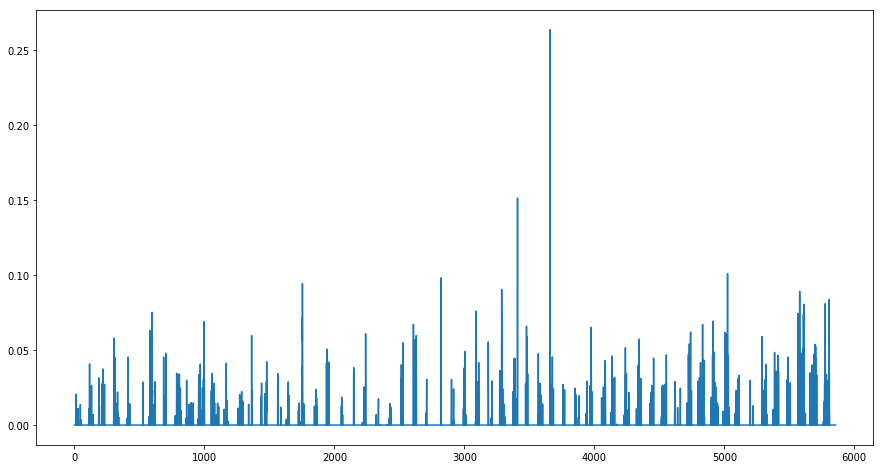

In [237]:
fig, ax = plt.subplots(figsize = (15,8))
# ax.scatter(
# 			np.arange(len(daytime_dict)), 
# 			data_array[:, 1299],s=4)
plt.plot(data_array[:, 0])

In [238]:
np.max(data_array)

1.0

In [ ]:
meta = pd.concat([meta_train, meta_test, meta_valid], axis = 0)
    meta = clean_data(meta)
    
    meta_corr = meta.corr(method='pearson').iloc[:, [0]]
    meta_corr = meta_corr.fillna(0)
    features  = list(meta_corr.index)[:] 


    fig, ax = plt.subplots(figsize = (100,5))

    plt.xticks(range(len(features)),  features, rotation=90)
    plt.plot(list(meta_corr.iloc[:,0]))
    # plt.plot(np.zeros(len(features)), linestyle = ":")
    ax.axhline(y=correlation_mark, linestyle = ":", color = 'r')
    ax.axhline(y= 0.0, linestyle = ":", color = 'r')
    ax.axhline(y= -correlation_mark, linestyle = ":", color = 'r')
    ax.set_ylim(-0.5, 0.5)
    plt.show()
    
    
    ############## feature selection #################
    features_select = []
    for i in range(len(list(meta_corr.iloc[:,0]))):
        if abs(list(meta_corr.iloc[:,0])[i]) >= correlation_mark:
			print feature[i], list(meta_corr.iloc[:,0])[i]
			features_select.append(features[i])
            
    print 'number of features: {}'.format(len(features_select))
    print features_select
    meta_train = clean_data(meta_train)
    meta_test = clean_data(meta_test)
    meta_valid = clean_data(meta_valid)

    meta_train_select = meta_train[features_select]
    meta_test_select = meta_test[features_select]
    meta_valid_select = meta_valid[features_select]
    
    return meta_train_select, meta_test_select, meta_valid_select

In [5]:
hf = h5py.File('processed_data/test_processed.h5', 'r')
test = hf.get('data')[:]

In [7]:
test.shape

(5856, 1329)